<a href="https://colab.research.google.com/github/pndlghn/PanduAlghani_2306130_LatihanWorkFlowAI/blob/main/AI_Workflow_Toko_Kai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd

#membuat data penjualan toko
data = {
    "date": ["2025-02-01", "2025-02-01", "2025-02-02", "2025-02-02", "2025-02-03", "2025-02-03"],
    "product": ["Minyak Goreng", "Beras", "Gula", "Tepung", "Susu", "Telur"],
    "sold": [10, 5, 7, 3, 12, 8],
    "stock": [20, 14, 55, 23, 42, 3],
    "price": [27000, 15000, 150000, 150000, 11000, 27000 ],

}
# Simpan dalam DataFrame
df = pd.DataFrame(data)

# Simpan sebagai file CSV
df.to_csv("data_penjualan.csv", index=False)
print("File csv berhasil dibuat dan disimpan sebagai 'data_penjualan.csv'! ")

File csv berhasil dibuat dan disimpan sebagai 'data_penjualan.csv'! 


In [14]:
# Memebaca file CSV
df = pd.read_csv("data_penjualan.csv")

# Menammpilan 5 data pertama
print(df.head())

         date        product  sold  stock   price
0  2025-02-01  Minyak Goreng    10     20   27000
1  2025-02-01          Beras     5     14   15000
2  2025-02-02           Gula     7     55  150000
3  2025-02-02         Tepung     3     23  150000
4  2025-02-03           Susu    12     42   11000


In [15]:
!pip install scikit_learn


In [16]:
# Cek apakah ada data yang kosong
print(df.isnull().sum())

#Konversi kolom "Tanggal" keformat date time
df["date"] = pd.to_datetime(df["date"])

#Menambahkan kolom "total sales"
df["sales_amount"] = df["sold"] * df["price"]

#Menambahkan kolom "profit" (asumsi modal yang dikeluarkan per barang adalah 10000)
df["profit"] = df["sales_amount"] - (df["sold"] * 10000)

#Menampilan
print(df.head())

date       0
product    0
sold       0
stock      0
price      0
dtype: int64
        date        product  sold  stock   price  sales_amount  profit
0 2025-02-01  Minyak Goreng    10     20   27000        270000  170000
1 2025-02-01          Beras     5     14   15000         75000   25000
2 2025-02-02           Gula     7     55  150000       1050000  980000
3 2025-02-02         Tepung     3     23  150000        450000  420000
4 2025-02-03           Susu    12     42   11000        132000   12000


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#Memilih fitur x dan targer y
x = df[["sold", "stock"]]
y = (df["stock"] < 5).astype(int) # 1 jika stock urang dari 5, 0 jika cukup

#split data menjadi train dan test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Membuat model decision tree
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

#evaluasi model
y_pred = model.predict(x_test)
print("Akurasi Model: ", accuracy_score(y_test, y_pred))



Akurasi Model:  1.0


In [18]:
#contoh produk baru (jumlah terjual 8, stok barang 3)

new_product = pd.DataFrame([[8, 3]], columns=["sold", "stock"])
predict = model.predict(new_product)

if predict[0] == 1:
  print("Product perlu di restock!")
else:
  print("Stok masih cukup")

Product perlu di restock!


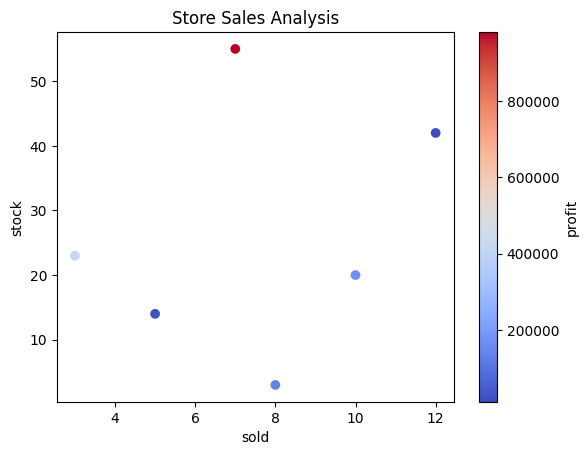

In [21]:
import matplotlib.pyplot as plt

plt.scatter(df["sold"], df["stock"], c=df["profit"], cmap="coolwarm")
plt.xlabel("sold")
plt.ylabel("stock")
plt.title("Store Sales Analysis")
plt.colorbar(label="profit")
plt.show()
